# Bài toán minh họa
\begin{split}
\text{Maximize } &x_{1} + x_{2}\\
\text{Subject to } &2x_{1} + 3x_{2} \le 6 \\
                   &-4x_{1} + 5x_{2} \le 7 \\
                    &6x_{1} + 7x_{2} \le 8
\end{split}

## 1.Visualize hàm mục tiêu và miền xác định
# Trường hợp hàm mục tiêu gồm 2 biến
\begin{equation*}
    \begin{split}
        \text{Maximize }  & c^{\intercal}x \\
        \text{Subject to } & Ax \leq b \\
                    & x \geq 0
    \end{split}
\end{equation*}

<ipython-input-1-d49f7369f8f1>:33: RuntimeWarning: divide by zero encountered in log
  barrier_function = barrier_function + mu *(np.log(x1) + np.log(x2))
<ipython-input-1-d49f7369f8f1>:51: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, constraint1, levels=[0], colors='r', linestyles='--', label='Constraint 1')
<ipython-input-1-d49f7369f8f1>:52: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, constraint2, levels=[0], colors='g', linestyles='--', label='Constraint 2')
<ipython-input-1-d49f7369f8f1>:53: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, constraint3, levels=[0], colors='b', linestyles='--', label='Constraint 3')


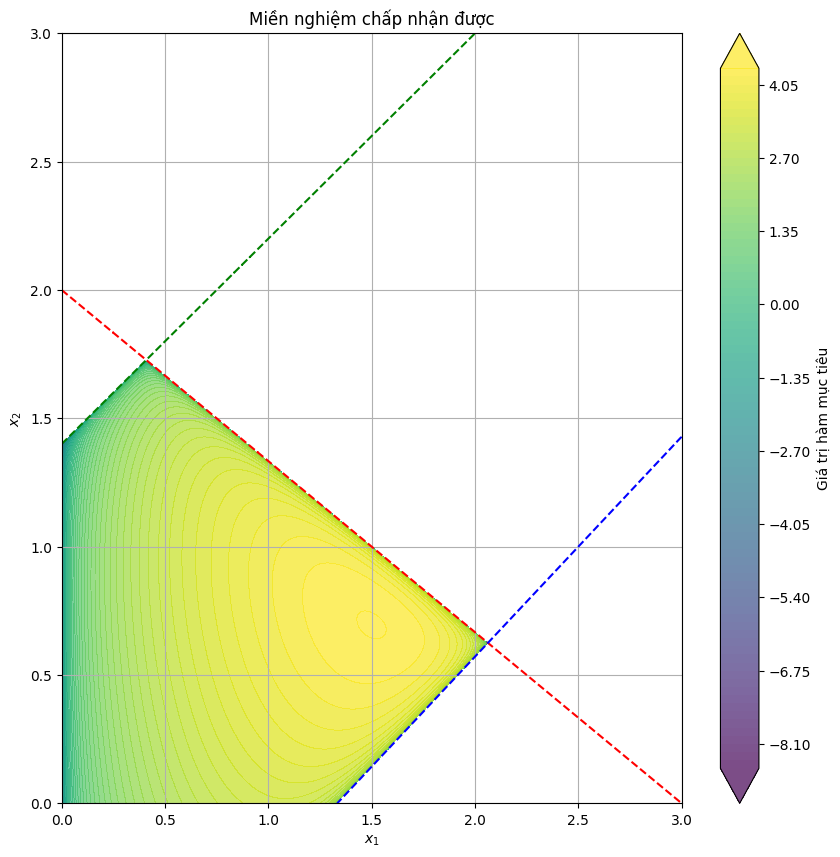

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Khởi tạo bài toán gốc
cT = np.array([1, 1])
A = np.array([      # max: x1 + x2
    [2, 3],         # 2x1 + 3x2 <= 6
    [-4, 5],        # -4x1 + 5x2 <= 7
    [6, -7]         # 6x1 - 7x2 <= 8

], dtype=float)
bT = np.array([6, 7, 8])

# Tạo grid
x1 = np.linspace(0, 3, 400)
x2 = np.linspace(0, 3, 400)
X1, X2 = np.meshgrid(x1, x2)

# Define các constraints (tương ứng với w1, w2, ...)
constraint1 = A[0][0]*X1 + A[0][1]*X2 - bT[0]
constraint2 = A[1][0]*X1 + A[1][1]*X2 - bT[1]
constraint3 = A[2][0]*X1 + A[2][1]*X2 - bT[2]

mu = 0.5
epsilon = 1e-6

barrier_function = mu * (np.log(-np.minimum(constraint1, -epsilon)) +
                         np.log(-np.minimum(constraint2, -epsilon)) +
                         np.log(-np.minimum(constraint3, -epsilon)))

barrier_function = barrier_function + mu *(np.log(x1) + np.log(x2))


goal_function = cT[0]*X1 + cT[1]*X2 + barrier_function


feasible_mask = (constraint1 <= 0) & (constraint2 <= 0) & (constraint3 <= 0)
goal_function = np.where(feasible_mask, goal_function, np.nan)


plt.figure(figsize=(10, 10))
contour = plt.contourf(X1, X2, goal_function, cmap='viridis', levels=100, alpha=0.7, extend='both')


cbar = plt.colorbar(contour)
cbar.set_label('Giá trị hàm mục tiêu')


plt.contour(X1, X2, constraint1, levels=[0], colors='r', linestyles='--', label='Constraint 1')
plt.contour(X1, X2, constraint2, levels=[0], colors='g', linestyles='--', label='Constraint 2')
plt.contour(X1, X2, constraint3, levels=[0], colors='b', linestyles='--', label='Constraint 3')


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Miền nghiệm chấp nhận được')

plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.show()

# Kiểm tra nghiệm của bài toán gốc
Credit: Giải các bài toán quy hoạch tuyến tính bằng scipy - anh Vũ Lê Thế Anh. [Link](https://colab.research.google.com/drive/1ZSY3bRbyX_1YA3Nb2tKI0e2XsQfn5nCl#scrollTo=dfF6lGAW2TOW)

In [ ]:
import scipy.optimize as so
from scipy.optimize import linprog
import numpy as np

In [ ]:
# Trước hết, ta cần tạo các tham số cần thiết để truyền vào hàm.

# Định nghĩa c
# Do đây là bài toán tối đa hóa, ta lấy phần đối của c
# c = - np.array([1,1])

# Định nghĩa A_ub và b_ub
# A_ub = np.array([
#     [2, 3],         # 2x1 + 3x2 <= 6
#     [-4, 5],        # -4x1 + 5x2 <= 7
#     [6, -7]         # 6x1 - 7x2 <= 8
# ], dtype=float)
# b_ub = np.array([6, 7, 8])

#Bài toán vận tải
c = np.matrix([30, 20, 25, 15])
A_ub = np.matrix([
    [1, 0, 1, 0],
    [0, 1, 0, 1]
], dtype=float)
b_ub = np.matrix([40, 60])

# Định nghĩa A_eq và b_eq
# Do bài toán không có điều kiện đẳng thức, ta không nhất thiết phải định nghĩa.
A_eq = np.matrix([
    [1, 1, 0, 0],
    [0, 0, 1, 1]
])
b_eq = np.matrix([20,30])

# Định nghĩa bounds
# Do các cận trùng với chế độ mặc định, ta không nhất thiết phải định nghĩa.
bounds = [
    (0, None)
    for i in range(len(c))
]

# Với đủ các tham số cần thiết, ta sử dụng hàm scipy.optimize.linprog
# để giải bài quy hoạch tuyến tính trên
result = linprog(
    c=c,
    A_ub=A_ub,
    b_ub=b_ub,
    A_eq=A_eq,
    b_eq=b_eq,
    bounds=bounds,
)

if result.success:
    print("Optimal value:", result.fun)
    # code gốc: print("Giá trị tối ưu:", result.fun) #Ở đây không hiểu tại sao code gốc lại âm?
    print("Optimal solution:", result.x)
else:
    print("Error:", result.message)

Optimal value: 850.0
Optimal solution: [ 0. 20.  0. 30.]


# Giải hàm Lagrange


In [ ]:
import numpy as np

def convertDiag(x):
  X = np.zeros((len(x), len(x)))
  for i in range(len(x)):
    X[i][i] = x[i]
  return X

#Newton's Method

def Newton_Method(x, w, y, z, mu, c, A, b):
  X = convertDiag(x)
  Y = convertDiag(y)
  W = convertDiag(w)
  Z = convertDiag(z)

  AT = np.transpose(A)
  m = A.shape[0]
  n = A.shape[1]

  F_e = np.block([[np.dot(A, x) + w - b],
                  [np.dot(AT, y) - z - c],
                  [np.dot(X, z) - mu * np.ones((n, 1))],
                  [np.dot(Y, w) - mu * np.ones((m, 1))]
                  ])

  dF_e = np.block([
      [A, np.identity(m), np.zeros((m,m)), np.zeros((m,n))],
      [np.zeros((n, n)), np.zeros((n,m)), AT, -np.identity(n)],
      [Z, np.zeros((n,m)), np.zeros((n,m)), X],
      [np.zeros((m,n)), Y, W, np.zeros((m,n))]
      ])

  res = np.linalg.solve(dF_e, -1 * F_e) #Giải delta xi

  delta_x = res[:n]
  delta_w = res[n:n+m]
  delta_y = res[n+m:n+m+m]
  delta_z = res[n+m+m:]

  return delta_x, delta_w, delta_y, delta_z

#Phase II in algorithm

epsilon = 1e-10
def phase_II(x, c, A, b):
  mu = 1

  AT = np.transpose(A)
  m = A.shape[0]
  n = A.shape[1]


  w = b - np.dot(A, x)
  y = np.matrix(np.ones((m, 1)))
  z = np.matrix(np.ones((n, 1)))


  while mu >= epsilon:
    delta_x, delta_w, delta_y, delta_z =  Newton_Method(x, w, y, z, mu, c, A, b)

    #Thay (x,w,y,z) với bộ nghiệm mới
    x = x + delta_x
    y = y + delta_y
    w = w + delta_w
    z = z + delta_z

    #Thay giá trị mới của mu
    mu = (1 - 1 / (2 * np.sqrt(n))) * mu

  return x

#Phase I in algorithm
def phase_I(c, A, b):
  m = A.shape[0]
  n = A.shape[1]

  c_I = np.matrix(np.zeros((n + 1, 1)))
  c_I[0] = -1

  A_I = np.block([np.matrix(np.full((m, 1), -1)), A])

  upperBoundS = b.max() * 10

  x = np.block([[np.matrix([upperBoundS])], [np.matrix(np.zeros((n, 1)))]])

  x_st = phase_II(x, c_I, A_I, b)

  return x_st

#Giải hàm Lagrange
def solve(cT, A, bT):
  c = np.transpose(cT)
  b = np.transpose(bT)

  x_start = phase_I(c, A, b)
  x_start = x_start[1:, :]

  print(np.round(x_start, 1))

  x_optimal = phase_II(x_start, c, A, b)

  print(np.round(x_optimal, 1))

  return np.round(np.dot(cT, x_optimal), 3)

# cT = np.matrix([-1, 1])
# A = np.matrix([[1, -1],
#                [1, 1]])
# bT = np.matrix([2, 6])

# print(solve(cT, A, bT))

# cT = np.matrix([1, 1])
# A = np.matrix([      # max: x1 + x2
#     [2, 3],         # 2x1 + 3x2 <= 6
#     [-4, 5],        # -4x1 + 5x2 <= 7
#     [6, -7]         # 6x1 - 7x2 <= 8
# ], dtype=float)
# bT = np.matrix([6, 7, 8])

# print(solve(cT, A, bT))

# Bài toán vận tải:

cT = - np.matrix([30, 20, 25, 15])
A = np.matrix([
    [1, 1, 0, 0],
    [0, 0, 1, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1]
], dtype=float)
bT = np.matrix([20, 30, 40, 60])


# cT = np.matrix([1, 2, -1])
# A = np.matrix([[2, 1, -1],
#               [0, 1, 3],
#               [2, 1, 1]])
# bT = np.matrix([2, 4, 4])

print(solve(cT, A, bT))


[[5.9]
 [6.5]
 [8.3]
 [9.5]]
[[20.]
 [-0.]
 [30.]
 [-0.]]
[[-1350.]]


<ipython-input-72-202a2238b61f>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[i][i] = x[i]


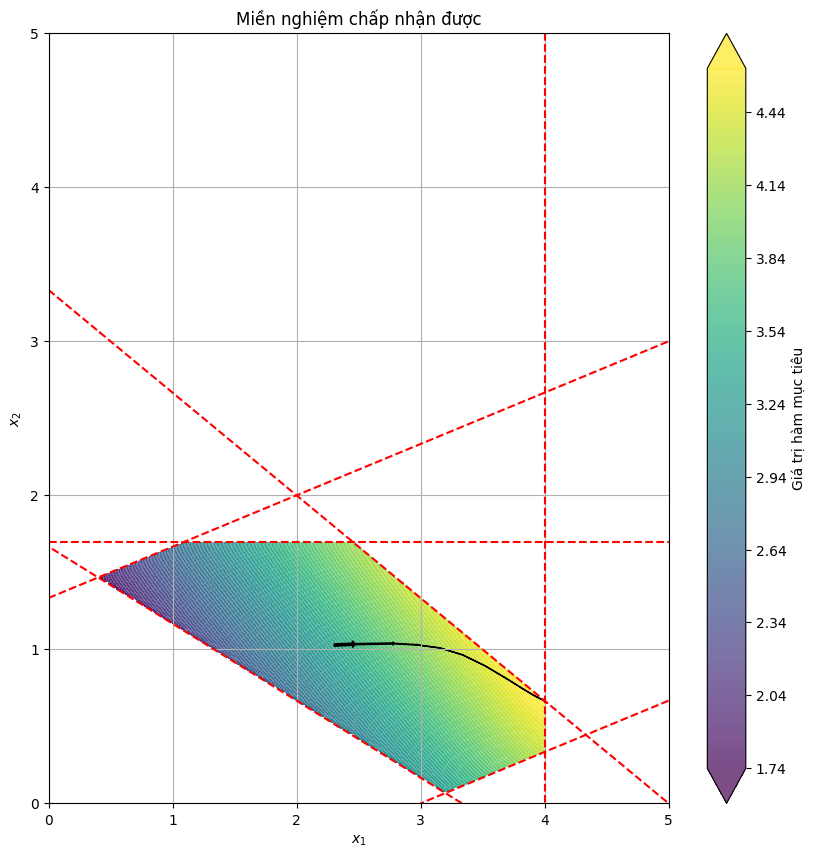

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def convertDiag(x):
    X = np.zeros((len(x), len(x)))
    for i in range(len(x)):
        X[i][i] = x[i, 0]
    return X

def Newton_Method(x, w, y, z, mu, c, A, b):
    X = convertDiag(x)
    Y = convertDiag(y)
    W = convertDiag(w)
    Z = convertDiag(z)

    AT = np.transpose(A)
    m, n = A.shape

    F_e = np.block([[np.dot(A, x) + w - b],
                    [np.dot(AT, y) - z - c],
                    [np.dot(X, z) - mu * np.ones((n, 1))],
                    [np.dot(Y, w) - mu * np.ones((m, 1))]])

    dF_e = np.block([
        [A, np.identity(m), np.zeros((m, m)), np.zeros((m, n))],
        [np.zeros((n, n)), np.zeros((n, m)), AT, -np.identity(n)],
        [Z, np.zeros((n, m)), np.zeros((n, m)), X],
        [np.zeros((m, n)), Y, W, np.zeros((m, n))]
    ])

    res = np.linalg.solve(dF_e, -1 * F_e)

    delta_x = res[:n]
    delta_w = res[n:n + m]
    delta_y = res[n + m:n + m + m]
    delta_z = res[n + m + m:]

    return delta_x, delta_w, delta_y, delta_z

epsilon = 1e-10
def phase_II(x, c, A, b):
    mu = 1

    AT = np.transpose(A)
    m, n = A.shape

    w = b - np.dot(A, x)
    y = np.ones((m, 1))
    z = np.ones((n, 1))

    path = []

    path.append([float(x[0, 0]), float(x[1, 0])])

    while mu >= epsilon:
        delta_x, delta_w, delta_y, delta_z = Newton_Method(x, w, y, z, mu, c, A, b)

        x = x + delta_x
        y = y + delta_y
        w = w + delta_w
        z = z + delta_z

        path.append([float(x[0, 0]), float(x[1, 0])])

        mu = (1 - 1 / (2 * np.sqrt(n))) * mu

    return x, path

def phase_I(c, A, b):
    m, n = A.shape

    c_I = np.zeros((n + 1, 1))
    c_I[0, 0] = -1

    A_I = np.block([np.full((m, 1), -1), A])

    upperBoundS = max(abs(b.min()), abs(b.max())) + 1

    x = np.block([[np.matrix([upperBoundS])], [np.zeros((n, 1))]])

    x_st, path = phase_II(x, c_I, A_I, b)

    return x_st

def solve(cT, A, bT):
    c = np.transpose(cT)
    b = np.transpose(bT)

    x_start = phase_I(c, A, b)
    x_start = x_start[1:, :]

    x_optimal, path = phase_II(x_start, c, A, b)

    return np.round(np.dot(cT, x_optimal), 3), path

def visualize(cT, A, bT, cpath_points, lim_x1=10, lim_x2=10):
    x1 = np.linspace(0, lim_x1, 400)
    x2 = np.linspace(0, lim_x2, 400)
    X1, X2 = np.meshgrid(x1, x2)

    m, n = A.shape

    constraint = []
    for i in range(m):
        constraint.append(A[i][0]*X1 + A[i][1]*X2 - bT[i])

    constraint = np.array(constraint)

    mu = 0.01
    epsilon = 1e-6

    barrier_function = np.log(-np.minimum(constraint[0], -epsilon))
    for i in range(1, m):
        barrier_function = barrier_function + np.log(-np.minimum(constraint[i], -epsilon))
    barrier_function = mu * barrier_function
    barrier_function = barrier_function + mu * (np.log(x1 + epsilon) + np.log(x2 + epsilon))

    goal_function = cT[0]*X1 + cT[1]*X2 + barrier_function

    feasible_mask = (constraint[0] <= 0)
    for i in range(1, m):
        feasible_mask = feasible_mask & (constraint[i] <= 0)
    goal_function = np.where(feasible_mask, goal_function, np.nan)

    plt.figure(figsize=(10, 10))
    contour = plt.contourf(X1, X2, goal_function, cmap='viridis', levels=100, alpha=0.7, extend='both')

    cbar = plt.colorbar(contour)
    cbar.set_label('Giá trị hàm mục tiêu')

    for i in range(m):
        plt.contour(X1, X2, constraint[i], levels=[0], colors='r', linestyles='--')

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Miền nghiệm chấp nhận được')

    arrow_size = 0.03
    for i in range(len(cpath_points) - 1):
        arrow_size = arrow_size * 0.5
        vector_start = (cpath_points[i][0], cpath_points[i][1])
        vector_end = (cpath_points[i + 1][0], cpath_points[i + 1][1])
        plt.arrow(vector_start[0], vector_start[1],
                  vector_end[0] - vector_start[0],
                  vector_end[1] - vector_start[1], width=arrow_size,
                  head_width=arrow_size * 3, head_length=arrow_size * 1.5,
                  fc='black', ec='black')

    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.show()

def solveAndVisualize(cT, A, bT, lim_x1 = 10, lim_x2 = 10):
  ans, path = solve(cT, A, bT)

  cT = np.asarray(cT)[0]
  A = np.array(A)
  bT = np.asarray(bT)[0]

  visualize(cT, A, bT, path, lim_x1, lim_x2)

# Khởi tạo bài toán gốc

# Test 1
# cT = np.matrix([1, 1])
# A = np.matrix([      # max: x1 + x2
#     [2, 3],         # 2x1 + 3x2 <= 6
#     [-4, 5],        # -4x1 + 5x2 <= 7
#     [6, -7]         # 6x1 - 7x2 <= 8
# ])
# bT = np.matrix([6, 7, 8])
# solveAndVisualize(cT, A, bT, 5, 5)

# Test 2
# cT = np.matrix([-1, 1])
# A = np.matrix([[1, -1],
#                [1, 1]])
# bT = np.matrix([2, 6])
# solveAndVisualize(cT, A, bT)

# Test 3
cT = np.matrix([1, 1])
A = np.matrix([[1, 0],
               [0, 1],
              [2, 3],
              [1, -3],
              [-2, 6],
              [-3, -6]])
bT = np.matrix([4, 1.7, 10, 3, 8, -10])
solveAndVisualize(cT, A, bT, 5, 5)




## Y chang mà Pha I sài PP Newton

[[6.]]


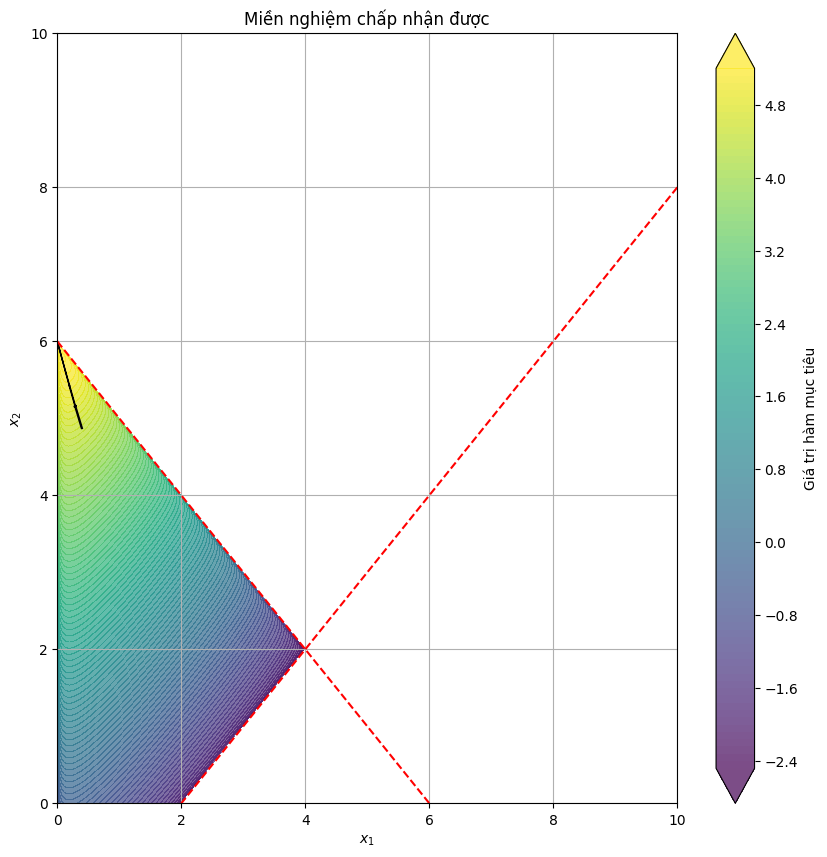

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def convertDiag(x):
    X = np.zeros((len(x), len(x)))
    for i in range(len(x)):
        X[i][i] = x[i, 0]  # Extract the single element from the array
    return X

def Newton_Method(x, w, y, z, mu, c, A, b):
    X = convertDiag(x)
    Y = convertDiag(y)
    W = convertDiag(w)
    Z = convertDiag(z)

    AT = np.transpose(A)
    m, n = A.shape

    F_e = np.block([[np.dot(A, x) + w - b],
                    [np.dot(AT, y) - z - c],
                    [np.dot(X, z) - mu * np.ones((n, 1))],
                    [np.dot(Y, w) - mu * np.ones((m, 1))]])

    dF_e = np.block([
        [A, np.identity(m), np.zeros((m, m)), np.zeros((m, n))],
        [np.zeros((n, n)), np.zeros((n, m)), AT, -np.identity(n)],
        [Z, np.zeros((n, m)), np.zeros((n, m)), X],
        [np.zeros((m, n)), Y, W, np.zeros((m, n))]
    ])

    res = np.linalg.solve(dF_e, -1 * F_e)

    delta_x = res[:n]
    delta_w = res[n:n + m]
    delta_y = res[n + m:n + m + m]
    delta_z = res[n + m + m:]

    return delta_x, delta_w, delta_y, delta_z

epsilon = 1e-10
def phase_II(x, w, y, z, c, A, b):
    mu = 1

    AT = np.transpose(A)
    m, n = A.shape

    path = []

    path.append([float(x[0, 0]), float(x[1, 0])])  # Extract single elements

    while mu >= epsilon:
        mu = (1 - 1 / (2 * np.sqrt(n))) * mu

        delta_x, delta_w, delta_y, delta_z = Newton_Method(x, w, y, z, mu, c, A, b)

        x = x + delta_x
        y = y + delta_y
        w = w + delta_w
        z = z + delta_z

        path.append([float(x[0, 0]), float(x[1, 0])])  # Extract single elements


    return x, path

def phase_I(c, A, b):
    m, n = A.shape

    x = np.ones((n, 1))
    w = np.ones((m, 1))
    y = np.ones((m, 1))
    z = np.ones((n, 1))

    for i in range(100):
        delta_x, delta_w, delta_y, delta_z = Newton_Method(x, w, y, z, 1, c, A, b)

        x = x + delta_x
        y = y + delta_y
        w = w + delta_w
        z = z + delta_z

    return x, w, y, z

def solve(cT, A, bT):
    c = np.transpose(cT)
    b = np.transpose(bT)

    x_start, w_start, y_start, z_start = phase_I(c, A, b)

    x_optimal, path = phase_II(x_start, w_start, y_start, z_start, c, A, b)

    return np.round(np.dot(cT, x_optimal), 3), path

def visualize(cT, A, bT, cpath_points, lim_x1=10, lim_x2=10):
    x1 = np.linspace(0, lim_x1, 400)
    x2 = np.linspace(0, lim_x2, 400)
    X1, X2 = np.meshgrid(x1, x2)

    m, n = A.shape

    constraint = []
    for i in range(m):
        constraint.append(A[i][0]*X1 + A[i][1]*X2 - bT[i])

    constraint = np.array(constraint)

    mu = 0.1
    epsilon = 1e-6

    barrier_function = np.log(-np.minimum(constraint[0], -epsilon))
    for i in range(1, m):
        barrier_function = barrier_function + np.log(-np.minimum(constraint[i], -epsilon))
    barrier_function = mu * barrier_function
    barrier_function = barrier_function + mu * (np.log(x1 + epsilon) + np.log(x2 + epsilon))

    goal_function = cT[0]*X1 + cT[1]*X2 + barrier_function

    feasible_mask = (constraint[0] <= 0)
    for i in range(1, m):
        feasible_mask = feasible_mask & (constraint[i] <= 0)
    goal_function = np.where(feasible_mask, goal_function, np.nan)

    plt.figure(figsize=(10, 10))
    contour = plt.contourf(X1, X2, goal_function, cmap='viridis', levels=100, alpha=0.7, extend='both')

    cbar = plt.colorbar(contour)
    cbar.set_label('Giá trị hàm mục tiêu')

    for i in range(m):
        plt.contour(X1, X2, constraint[i], levels=[0], colors='r', linestyles='--')

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Miền nghiệm chấp nhận được')

    arrow_size = 0.03
    for i in range(len(cpath_points) - 1):
        arrow_size = arrow_size * 0.5
        vector_start = (cpath_points[i][0], cpath_points[i][1])
        vector_end = (cpath_points[i + 1][0], cpath_points[i + 1][1])
        plt.arrow(vector_start[0], vector_start[1],
                  vector_end[0] - vector_start[0],
                  vector_end[1] - vector_start[1], width=arrow_size,
                  head_width=arrow_size * 3, head_length=arrow_size * 1.5,
                  fc='black', ec='black')

    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.show()

def solveAndVisualize(cT, A, bT, lim_x1 = 10, lim_x2 = 10):
  ans, path = solve(cT, A, bT)

  print(ans)

  cT = np.asarray(cT)[0]
  A = np.array(A)
  bT = np.asarray(bT)[0]

  visualize(cT, A, bT, path, lim_x1, lim_x2)

# Khởi tạo bài toán gốc

# Test 1
# cT = np.matrix([1, 1])
# A = np.matrix([      # max: x1 + x2
#     [2, 3],         # 2x1 + 3x2 <= 6
#     [-4, 5],        # -4x1 + 5x2 <= 7
#     [6, -7]         # 6x1 - 7x2 <= 8
# ])
# bT = np.matrix([6, 7, 8])
# solveAndVisualize(cT, A, bT, 5, 5)

# Test 2
cT = np.matrix([-1, 1])
A = np.matrix([[1, -1],
               [1, 1]])
bT = np.matrix([2, 6])
solveAndVisualize(cT, A, bT)

# Test 3
# cT = np.matrix([1, 1])
# A = np.matrix([[1, 0],
#                [0, 1],
#               [2, 3],
#               [1, -3],
#               [-2, 6],
#               [-3, -6]])
# bT = np.matrix([4, 1.7, 10, 3, 8, -10])
# solveAndVisualize(cT, A, bT, 5, 5)

# cT = np.matrix([-30, -20])
# A = np.matrix([
#     [1, 0],
#     [0, 1],
#     [1, 1]
# ])
# bT = np.matrix([40, 60, 80])
# solveAndVisualize(cT, A, bT, 100, 100)
